In [1]:
cd E:\bhagi\pthon\datasets

E:\bhagi\pthon\datasets


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab as p
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [3]:
raw_data=pd.read_csv('cars_data-final.csv')
raw_data.head(3)

Name      Price       Rating  city  \
0         2010 Maruti Alto LXI  ₹ 174,699    4out of 5  3686   
1  2013 Maruti Wagon R 1.0 VXI  ₹ 333,999  4.2out of 5  3686   
2  2014 Maruti Wagon R 1.0 VXI  ₹ 353,199  4.3out of 5  3686   

            Kilometers            Year_of_Purchase              Owner  \
0  Kilometers34,854 km    Year of PurchaseMay 2010   OwnerFirst Owner   
1  Kilometers39,541 km   Year of PurchaseJuly 2013  OwnerSecond Owner   
2  Kilometers23,233 km  Year of PurchaseMarch 2014  OwnerSecond Owner   

    Fuel_Type        Transmission      RTO           Insurance  \
0  FuelPetrol  TransmissionMANUAL  RTOAP09                 NaN   
1  FuelPetrol  TransmissionMANUAL  RTOAP28   Insurance6/8/2021   
2  FuelPetrol  TransmissionMANUAL  RTOAP28  Insurance28/4/2021   

                    Insurance_Type  
0  Insurance TypeInsurance Expired  
1               Insurance TypeComp  
2               Insurance TypeComp

In [4]:
raw_data[['year','comp','model']]=raw_data['Name'].str.split(' ',n=2,expand=True)
raw_data.drop(columns=['Name'],inplace=True)

In [5]:
raw_data['year']=raw_data['year'].astype(int)
raw_data.head(3)

Price       Rating  city           Kilometers  \
0  ₹ 174,699    4out of 5  3686  Kilometers34,854 km   
1  ₹ 333,999  4.2out of 5  3686  Kilometers39,541 km   
2  ₹ 353,199  4.3out of 5  3686  Kilometers23,233 km   

             Year_of_Purchase              Owner   Fuel_Type  \
0    Year of PurchaseMay 2010   OwnerFirst Owner  FuelPetrol   
1   Year of PurchaseJuly 2013  OwnerSecond Owner  FuelPetrol   
2  Year of PurchaseMarch 2014  OwnerSecond Owner  FuelPetrol   

         Transmission      RTO           Insurance  \
0  TransmissionMANUAL  RTOAP09                 NaN   
1  TransmissionMANUAL  RTOAP28   Insurance6/8/2021   
2  TransmissionMANUAL  RTOAP28  Insurance28/4/2021   

                    Insurance_Type  year    comp            model  
0  Insurance TypeInsurance Expired  2010  Maruti         Alto LXI  
1               Insurance TypeComp  2013  Maruti  Wagon R 1.0 VXI  
2               Insurance TypeComp  2014  Maruti  Wagon R 1.0 VXI

In [6]:
raw_data[['s','cost']]=raw_data.Price.str.split('₹',n=1,expand=True)
raw_data.drop(columns=['Price','s'],axis=1,inplace=True)
raw_data.head(3)

Rating  city           Kilometers            Year_of_Purchase  \
0    4out of 5  3686  Kilometers34,854 km    Year of PurchaseMay 2010   
1  4.2out of 5  3686  Kilometers39,541 km   Year of PurchaseJuly 2013   
2  4.3out of 5  3686  Kilometers23,233 km  Year of PurchaseMarch 2014   

               Owner   Fuel_Type        Transmission      RTO  \
0   OwnerFirst Owner  FuelPetrol  TransmissionMANUAL  RTOAP09   
1  OwnerSecond Owner  FuelPetrol  TransmissionMANUAL  RTOAP28   
2  OwnerSecond Owner  FuelPetrol  TransmissionMANUAL  RTOAP28   

            Insurance                   Insurance_Type  year    comp  \
0                 NaN  Insurance TypeInsurance Expired  2010  Maruti   
1   Insurance6/8/2021               Insurance TypeComp  2013  Maruti   
2  Insurance28/4/2021               Insurance TypeComp  2014  Maruti   

             model      cost  
0         Alto LXI   174,699  
1  Wagon R 1.0 VXI   333,999  
2  Wagon R 1.0 VXI   353,199

In [7]:
raw_data[['km','dist']]=raw_data.Kilometers.str.split('s',n=1,expand=True)
raw_data[['dist','unit']]=raw_data.dist.str.split(' ',n=1,expand=True)
raw_data.drop(columns=['Kilometers','km','unit'],axis=1,inplace=True)
raw_data.head(3)

Rating  city            Year_of_Purchase              Owner  \
0    4out of 5  3686    Year of PurchaseMay 2010   OwnerFirst Owner   
1  4.2out of 5  3686   Year of PurchaseJuly 2013  OwnerSecond Owner   
2  4.3out of 5  3686  Year of PurchaseMarch 2014  OwnerSecond Owner   

    Fuel_Type        Transmission      RTO           Insurance  \
0  FuelPetrol  TransmissionMANUAL  RTOAP09                 NaN   
1  FuelPetrol  TransmissionMANUAL  RTOAP28   Insurance6/8/2021   
2  FuelPetrol  TransmissionMANUAL  RTOAP28  Insurance28/4/2021   

                    Insurance_Type  year    comp            model      cost  \
0  Insurance TypeInsurance Expired  2010  Maruti         Alto LXI   174,699   
1               Insurance TypeComp  2013  Maruti  Wagon R 1.0 VXI   333,999   
2               Insurance TypeComp  2014  Maruti  Wagon R 1.0 VXI   353,199   

     dist  
0  34,854  
1  39,541  
2  23,233

In [8]:
raw_data[['rate','outf']]=raw_data.Rating.str.split('ou',n=1,expand=True)
raw_data.drop(columns=['outf','Rating'],axis=1,inplace=True)
raw_data.head(3)

city            Year_of_Purchase              Owner   Fuel_Type  \
0  3686    Year of PurchaseMay 2010   OwnerFirst Owner  FuelPetrol   
1  3686   Year of PurchaseJuly 2013  OwnerSecond Owner  FuelPetrol   
2  3686  Year of PurchaseMarch 2014  OwnerSecond Owner  FuelPetrol   

         Transmission      RTO           Insurance  \
0  TransmissionMANUAL  RTOAP09                 NaN   
1  TransmissionMANUAL  RTOAP28   Insurance6/8/2021   
2  TransmissionMANUAL  RTOAP28  Insurance28/4/2021   

                    Insurance_Type  year    comp            model      cost  \
0  Insurance TypeInsurance Expired  2010  Maruti         Alto LXI   174,699   
1               Insurance TypeComp  2013  Maruti  Wagon R 1.0 VXI   333,999   
2               Insurance TypeComp  2014  Maruti  Wagon R 1.0 VXI   353,199   

     dist rate  
0  34,854    4  
1  39,541  4.2  
2  23,233  4.3

In [9]:
raw_data[['yrp','pur_yr']]=raw_data.Year_of_Purchase.str.split('se',n=1,expand=True)
raw_data.drop(columns=['Year_of_Purchase','yrp'],axis=1,inplace=True)
raw_data[['prc_mnt','pur_year']]=raw_data.pur_yr.str.split(' ',n=1,expand=True)
raw_data.drop(columns=['pur_yr'],axis=1,inplace=True)
raw_data.head(3)

city              Owner   Fuel_Type        Transmission      RTO  \
0  3686   OwnerFirst Owner  FuelPetrol  TransmissionMANUAL  RTOAP09   
1  3686  OwnerSecond Owner  FuelPetrol  TransmissionMANUAL  RTOAP28   
2  3686  OwnerSecond Owner  FuelPetrol  TransmissionMANUAL  RTOAP28   

            Insurance                   Insurance_Type  year    comp  \
0                 NaN  Insurance TypeInsurance Expired  2010  Maruti   
1   Insurance6/8/2021               Insurance TypeComp  2013  Maruti   
2  Insurance28/4/2021               Insurance TypeComp  2014  Maruti   

             model      cost    dist rate prc_mnt pur_year  
0         Alto LXI   174,699  34,854    4     May     2010  
1  Wagon R 1.0 VXI   333,999  39,541  4.2    July     2013  
2  Wagon R 1.0 VXI   353,199  23,233  4.3   March     2014

In [10]:
raw_data[['own','ty_own']]=raw_data.Owner.str.split('er',n=1,expand=True)
raw_data[['owr','u_own']]=raw_data.ty_own.str.split(' ',n=1,expand=True)
raw_data.drop(columns=['own','ty_own','u_own','Owner'],axis=1,inplace=True)
raw_data.head(3)

city   Fuel_Type        Transmission      RTO           Insurance  \
0  3686  FuelPetrol  TransmissionMANUAL  RTOAP09                 NaN   
1  3686  FuelPetrol  TransmissionMANUAL  RTOAP28   Insurance6/8/2021   
2  3686  FuelPetrol  TransmissionMANUAL  RTOAP28  Insurance28/4/2021   

                    Insurance_Type  year    comp            model      cost  \
0  Insurance TypeInsurance Expired  2010  Maruti         Alto LXI   174,699   
1               Insurance TypeComp  2013  Maruti  Wagon R 1.0 VXI   333,999   
2               Insurance TypeComp  2014  Maruti  Wagon R 1.0 VXI   353,199   

     dist rate prc_mnt pur_year     owr  
0  34,854    4     May     2010   First  
1  39,541  4.2    July     2013  Second  
2  23,233  4.3   March     2014  Second

In [11]:
raw_data[['fuel','fuel_typ']]=raw_data.Fuel_Type.str.split('el',n=1,expand=True)
raw_data.drop(columns=['fuel','Fuel_Type'],axis=1,inplace=True)
raw_data.head(3)

city        Transmission      RTO           Insurance  \
0  3686  TransmissionMANUAL  RTOAP09                 NaN   
1  3686  TransmissionMANUAL  RTOAP28   Insurance6/8/2021   
2  3686  TransmissionMANUAL  RTOAP28  Insurance28/4/2021   

                    Insurance_Type  year    comp            model      cost  \
0  Insurance TypeInsurance Expired  2010  Maruti         Alto LXI   174,699   
1               Insurance TypeComp  2013  Maruti  Wagon R 1.0 VXI   333,999   
2               Insurance TypeComp  2014  Maruti  Wagon R 1.0 VXI   353,199   

     dist rate prc_mnt pur_year     owr fuel_typ  
0  34,854    4     May     2010   First   Petrol  
1  39,541  4.2    July     2013  Second   Petrol  
2  23,233  4.3   March     2014  Second   Petrol

In [12]:
raw_data[['trans','trans_typ']]=raw_data.Transmission.str.split('ion',n=1,expand=True)
raw_data.drop(columns=['trans','Transmission'],axis=1,inplace=True)
raw_data.head(3)

city      RTO           Insurance                   Insurance_Type  year  \
0  3686  RTOAP09                 NaN  Insurance TypeInsurance Expired  2010   
1  3686  RTOAP28   Insurance6/8/2021               Insurance TypeComp  2013   
2  3686  RTOAP28  Insurance28/4/2021               Insurance TypeComp  2014   

     comp            model      cost    dist rate prc_mnt pur_year     owr  \
0  Maruti         Alto LXI   174,699  34,854    4     May     2010   First   
1  Maruti  Wagon R 1.0 VXI   333,999  39,541  4.2    July     2013  Second   
2  Maruti  Wagon R 1.0 VXI   353,199  23,233  4.3   March     2014  Second   

  fuel_typ trans_typ  
0   Petrol    MANUAL  
1   Petrol    MANUAL  
2   Petrol    MANUAL

In [13]:
raw_data[['Insu','Ins_typ']]=raw_data.Insurance_Type.str.split('pe',n=1,expand=True)
raw_data.drop(columns=['Insu','Insurance_Type'],axis=1,inplace=True)
raw_data.head(3)

city      RTO           Insurance  year    comp            model      cost  \
0  3686  RTOAP09                 NaN  2010  Maruti         Alto LXI   174,699   
1  3686  RTOAP28   Insurance6/8/2021  2013  Maruti  Wagon R 1.0 VXI   333,999   
2  3686  RTOAP28  Insurance28/4/2021  2014  Maruti  Wagon R 1.0 VXI   353,199   

     dist rate prc_mnt pur_year     owr fuel_typ trans_typ            Ins_typ  
0  34,854    4     May     2010   First   Petrol    MANUAL  Insurance Expired  
1  39,541  4.2    July     2013  Second   Petrol    MANUAL               Comp  
2  23,233  4.3   March     2014  Second   Petrol    MANUAL               Comp

In [14]:
new=raw_data.RTO.str.split('',n=6,expand=True)
raw_data['Rto_st']=new[4]+new[5]
raw_data.drop(columns=['RTO','Insurance','pur_year'],axis=1,inplace=True)

In [15]:
raw_data['cost'] = raw_data['cost'].replace(',', '', regex=True).astype(float)
raw_data['dist'] = raw_data['dist'].replace(',', '', regex=True).astype(float)
raw_data['rate'] = raw_data['rate'].replace(',', '', regex=True).astype(float)

In [16]:
raw_data['Ins_typ']=raw_data['Ins_typ'].replace(['Not Available','Normal','null','NA','Comp'],'Comprehensive')
raw_data['Ins_typ']=raw_data['Ins_typ'].replace('Insurance Expired','Expired', regex=True)
raw_data['Ins_typ']=raw_data['Ins_typ'].replace('Third_party','3rd Party', regex=True)
raw_data['Ins_typ']=raw_data['Ins_typ'].replace('Zero Depreciation','Zero_Dep', regex=True)

In [17]:
raw_data.head(3)

city  year    comp            model      cost     dist  rate prc_mnt  \
0  3686  2010  Maruti         Alto LXI  174699.0  34854.0   4.0     May   
1  3686  2013  Maruti  Wagon R 1.0 VXI  333999.0  39541.0   4.2    July   
2  3686  2014  Maruti  Wagon R 1.0 VXI  353199.0  23233.0   4.3   March   

      owr fuel_typ trans_typ        Ins_typ Rto_st  
0   First   Petrol    MANUAL        Expired     AP  
1  Second   Petrol    MANUAL  Comprehensive     AP  
2  Second   Petrol    MANUAL  Comprehensive     AP

In [18]:
raw_data.shape

(32158, 13)

In [19]:
raw_data.size

418054

In [20]:
raw_data.columns

Index(['city', 'year', 'comp', 'model', 'cost', 'dist', 'rate', 'prc_mnt',
       'owr', 'fuel_typ', 'trans_typ', 'Ins_typ', 'Rto_st'],
      dtype='object')

In [21]:
raw_data.dtypes

city           int64
year           int32
comp          object
model         object
cost         float64
dist         float64
rate         float64
prc_mnt       object
owr           object
fuel_typ      object
trans_typ     object
Ins_typ       object
Rto_st        object
dtype: object

In [22]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32158 entries, 0 to 32157
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       32158 non-null  int64  
 1   year       32158 non-null  int32  
 2   comp       32158 non-null  object 
 3   model      32158 non-null  object 
 4   cost       32158 non-null  float64
 5   dist       32158 non-null  float64
 6   rate       32158 non-null  float64
 7   prc_mnt    32158 non-null  object 
 8   owr        32158 non-null  object 
 9   fuel_typ   32158 non-null  object 
 10  trans_typ  29342 non-null  object 
 11  Ins_typ    32158 non-null  object 
 12  Rto_st     32158 non-null  object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 3.1+ MB


In [23]:
raw_data.nunique()

city            10
year            38
comp            34
model         2675
cost          4822
dist         29089
rate            38
prc_mnt         12
owr             10
fuel_typ         6
trans_typ        2
Ins_typ          4
Rto_st          56
dtype: int64

# EDA

In [230]:
raw_data.describe()

city          year          cost          dist          rate
count  32158.000000  32158.000000  3.215800e+04  3.215800e+04  32158.000000
mean    2883.844207   2012.378537  4.760937e+05  7.630189e+04      4.046806
std     1569.462476      4.509912  4.521493e+05  5.303039e+04      0.617091
min      290.000000   1980.000000  1.000000e+00  1.000000e+00      0.500000
25%     1692.000000   2010.000000  2.100000e+05  3.833125e+04      3.800000
50%     2423.000000   2013.000000  3.680000e+05  6.924700e+04      4.100000
75%     4709.000000   2016.000000  6.000000e+05  1.015375e+05      4.400000
max     5732.000000   2020.000000  1.080170e+07  1.234567e+06      5.000000

In [231]:
print('The dataset has {0} samples.'.format(len(raw_data)))

The dataset has 32158 samples.


In [232]:
raw_data.describe().style.background_gradient(axis=1,cmap=sns.light_palette('green', as_cmap=True))

In [233]:
raw_data.describe(include=object)

comp      model  prc_mnt    owr fuel_typ trans_typ        Ins_typ  \
count    32158      32158    32158  32158    32158     29342          32158   
unique      34       2675       12     10        6         2              4   
top     Maruti  Swift VDI  January  First   Diesel    MANUAL  Comprehensive   
freq      9706        511     6620  19324    15121     26620          11832   

       Rto_st  
count   32158  
unique     56  
top        MH  
freq     7438

In [32]:
import pandas_profiling as pp
from pandas_profiling import ProfileReport
pp.ProfileReport(raw_data)

without missing value skewness : 
 
  city    0.219366
year   -0.881832
cost    4.516217
dist    2.291942
rate   -2.365610
dtype: float64

 Note :
  
  If,  -0.5 < Skewness < 0.5, the data are fairly symmetrical 
 If, -1 < Skewness < -0.5 or 0.5 < Skewness < 1.0, the data is moderately skewed 
 If, Skewness < -1.0 or 1 < Skewness, the data is highly skewed

Skewness for test : 


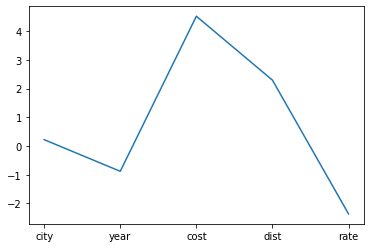

In [234]:
skewness=raw_data.skew(axis=0,skipna=True)
print("without missing value skewness : \n \n ",skewness)
print("\n Note :\n  \n  If,  -0.5 < Skewness < 0.5, the data are fairly symmetrical \n",
      "If, -1 < Skewness < -0.5 or 0.5 < Skewness < 1.0, the data is moderately skewed \n",
       "If, Skewness < -1.0 or 1 < Skewness, the data is highly skewed")
p.plot(raw_data.skew()) 
print( '\nSkewness for test : ')

without missing value kurtosis : 
 
  city    -0.954903
year     1.381351
cost    44.777339
dist    20.003382
rate     9.710756
dtype: float64
 
 Note :A normal random variable has a kurtosis of 3 irrespective of its mean or standard deviation. If a random variable’s kurtosis is greater than 3, it is said to be Leptokurtic. If its kurtosis is less than 3, it is said to be Platykurtic.

kurtosis of test : 


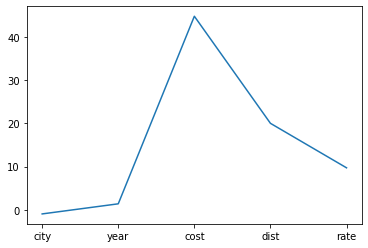

In [235]:
kurtosis=raw_data.kurtosis(axis=0)
print("without missing value kurtosis : \n \n ",kurtosis)
print(" \n Note :A normal random variable has a kurtosis of 3 irrespective of its mean or standard deviation. If a random variable’s kurtosis is greater than 3, it is said to be Leptokurtic. If its kurtosis is less than 3, it is said to be Platykurtic.")
p.plot(raw_data.kurtosis()) 
print( '\nkurtosis of test : ')

In [236]:
print('correlation of each coulmns along with that values')
raw_data.corr()

correlation of each coulmns along with that values


city      year      cost      dist      rate
city  1.000000  0.019408  0.106947 -0.048717  0.059268
year  0.019408  1.000000  0.500137 -0.386503  0.708459
cost  0.106947  0.500137  1.000000 -0.188334  0.426457
dist -0.048717 -0.386503 -0.188334  1.000000 -0.370296
rate  0.059268  0.708459  0.426457 -0.370296  1.000000

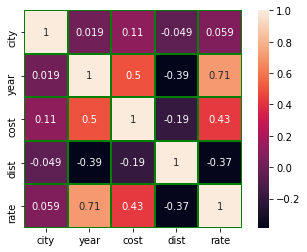

In [237]:
sns.heatmap(raw_data.corr(),linewidth=1,vmax=1.0,square=True,linecolor="green",annot=True)
plt.show()

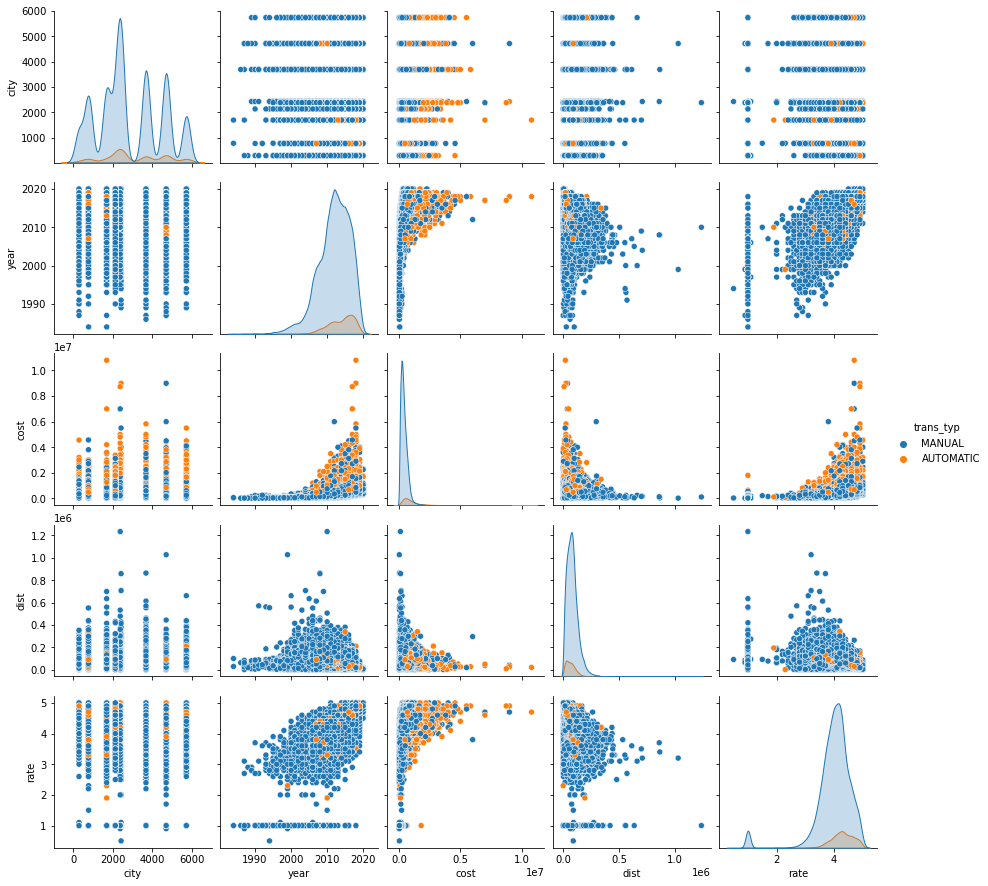

In [238]:
sns.pairplot(raw_data,hue='trans_typ')

In [39]:
raw_data.columns

Index(['city', 'year', 'comp', 'model', 'cost', 'dist', 'rate', 'prc_mnt',
       'owr', 'fuel_typ', 'trans_typ', 'Ins_typ', 'Rto_st'],
      dtype='object')

MANUAL       26620
AUTOMATIC     2722
Name: trans_typ, dtype: int64


<AxesSubplot:xlabel='trans_typ', ylabel='count'>

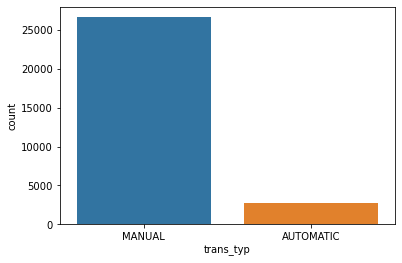

In [240]:
print(raw_data['trans_typ'].value_counts())
sns.countplot('trans_typ',data=raw_data)

Diesel          15121
Petrol          15013
Petrol + CNG     1496
Petrol + LPG      503
Electric           24
Hybrid              1
Name: fuel_typ, dtype: int64


<AxesSubplot:xlabel='fuel_typ', ylabel='count'>

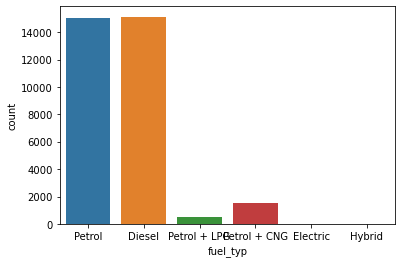

In [239]:
print(raw_data['fuel_typ'].value_counts())
sns.countplot('fuel_typ',data=raw_data)

Comprehensive    11832
Expired           9402
3rd Party         6290
Zero_Dep          4634
Name: Ins_typ, dtype: int64


<AxesSubplot:xlabel='Ins_typ', ylabel='count'>

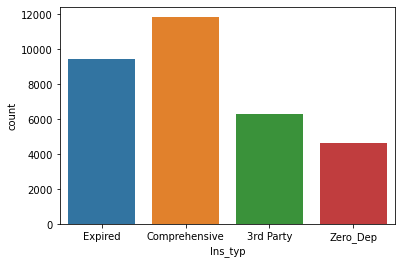

In [42]:
print(raw_data['Ins_typ'].value_counts())
sns.countplot('Ins_typ',data=raw_data)

First      19324
Second      9073
Third       2753
Fourth       719
Fifth        201
Sixth         51
Seventh       20
Eighth         9
Tenth          5
Ninth          3
Name: owr, dtype: int64


<AxesSubplot:xlabel='owr', ylabel='count'>

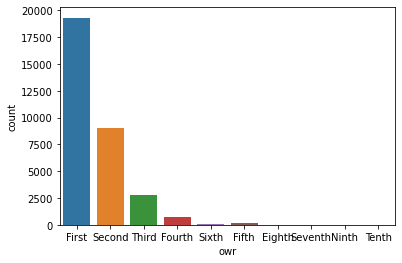

In [40]:
print(raw_data['owr'].value_counts())
sns.countplot('owr',data=raw_data)

<AxesSubplot:xlabel='cost', ylabel='Density'>

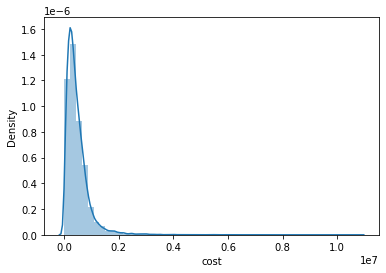

In [43]:
sns.distplot(raw_data['cost'])

<AxesSubplot:xlabel='dist', ylabel='Density'>

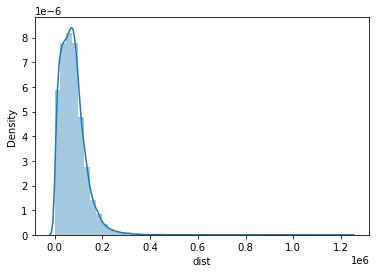

In [44]:
sns.distplot(raw_data['dist'])

<AxesSubplot:xlabel='rate', ylabel='Density'>

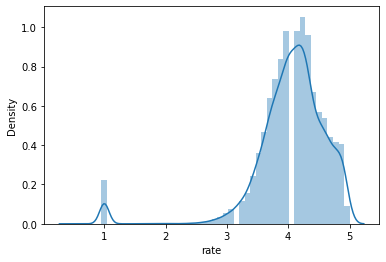

In [45]:
sns.distplot(raw_data['rate'])

<AxesSubplot:>

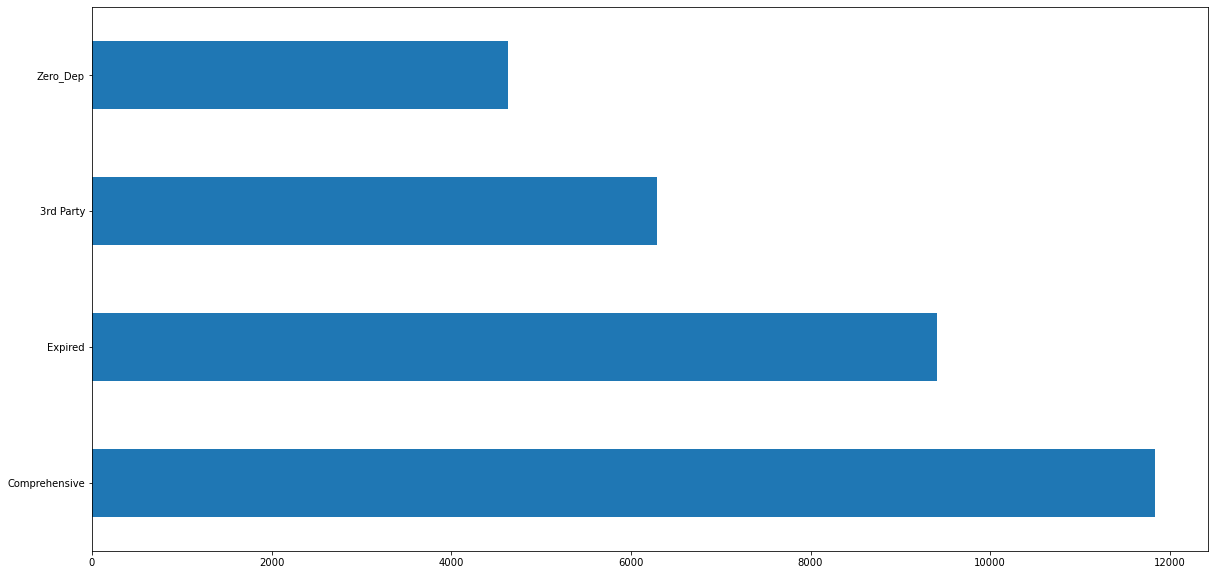

In [56]:
raw_data['Ins_typ'].value_counts().plot(kind='barh', figsize=(20,10))

<AxesSubplot:>

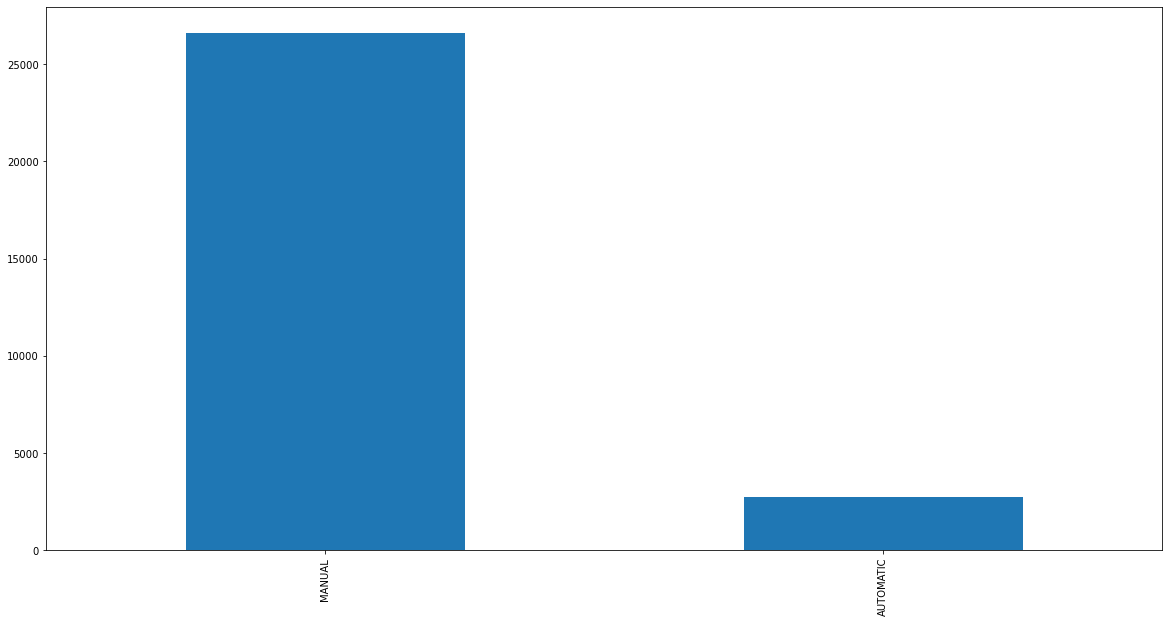

In [57]:
raw_data['trans_typ'].value_counts().plot(kind='bar', figsize=(20,10))

<AxesSubplot:>

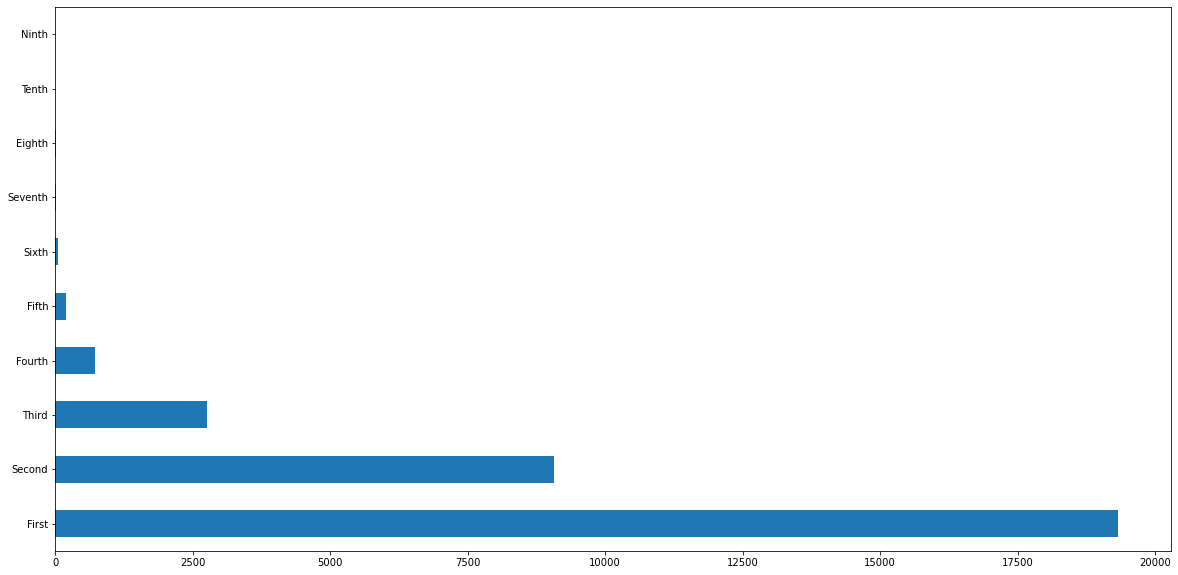

In [58]:
raw_data['owr'].value_counts().plot(kind='barh', figsize=(20,10))

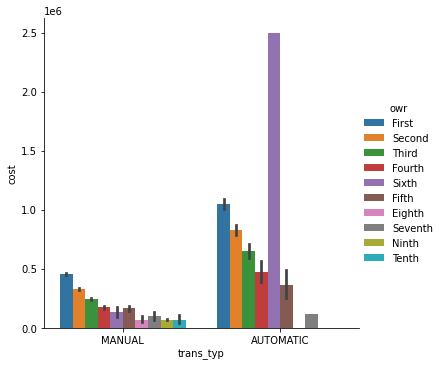

In [47]:
sns.catplot(x='trans_typ',y='cost',kind='bar',hue='owr',data=raw_data)

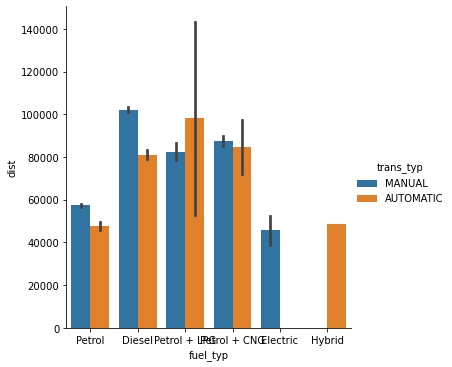

In [49]:
sns.catplot(x='fuel_typ',y='dist',kind='bar',hue='trans_typ',data=raw_data)

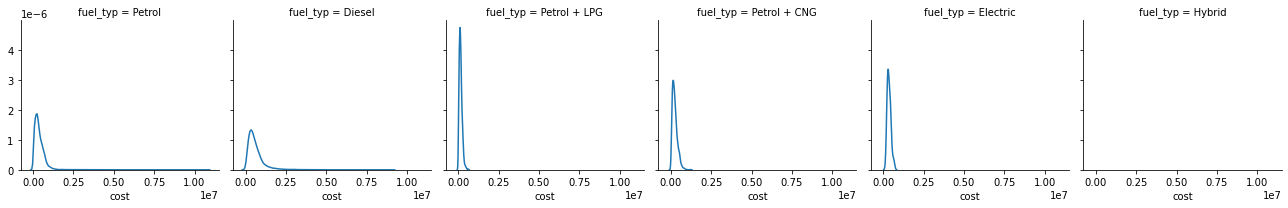

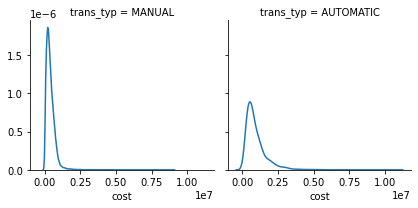

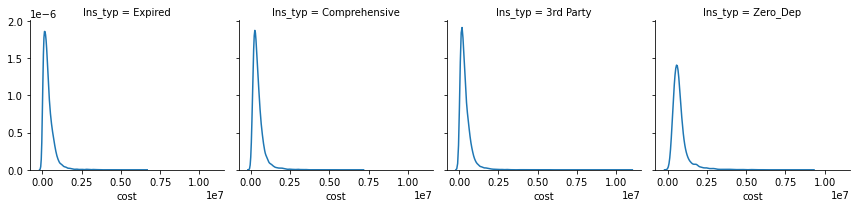

In [52]:
g = sns.FacetGrid(raw_data, col='fuel_typ')
g.map(sns.kdeplot, 'cost')
g = sns.FacetGrid(raw_data, col='trans_typ')
g.map(sns.kdeplot, 'cost')
g = sns.FacetGrid(raw_data, col='Ins_typ')
g.map(sns.kdeplot, 'cost')

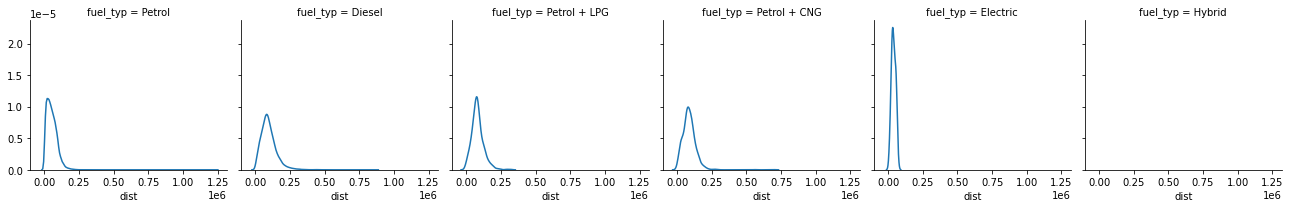

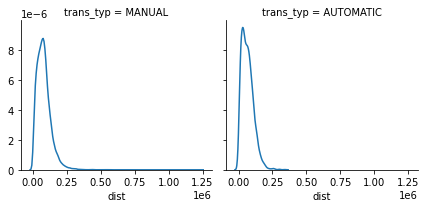

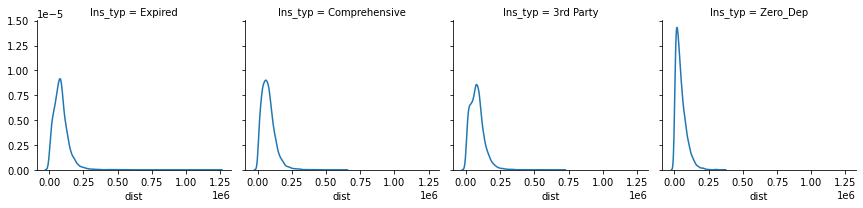

In [53]:
g = sns.FacetGrid(raw_data, col='fuel_typ')
g.map(sns.kdeplot, 'dist')
g = sns.FacetGrid(raw_data, col='trans_typ')
g.map(sns.kdeplot, 'dist')
g = sns.FacetGrid(raw_data, col='Ins_typ')
g.map(sns.kdeplot, 'dist')

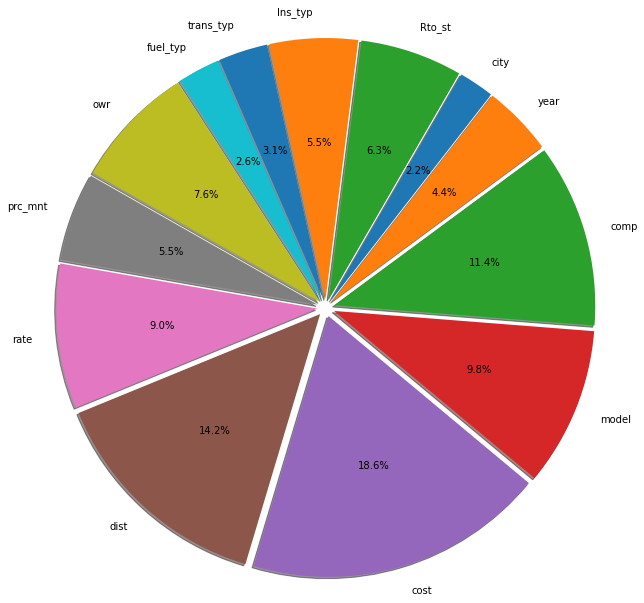

In [54]:
size=[10,20,52,45,85,65,41,25,35,12,14,25,29]
plt.axis("equal")
plt.pie(size,labels=raw_data.columns,autopct="%1.1f%%",radius=3,shadow=True,explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],startangle=60,counterclock=False)
plt.show()

<AxesSubplot:xlabel='dist', ylabel='cost'>

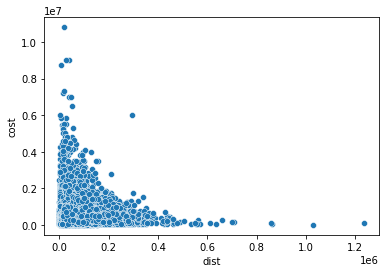

In [88]:
sns.scatterplot(x='dist',y='cost',data=raw_data)

# comparision cost and distance with comp

from the below figure we can easily understand the Daewoo  company have travel distance


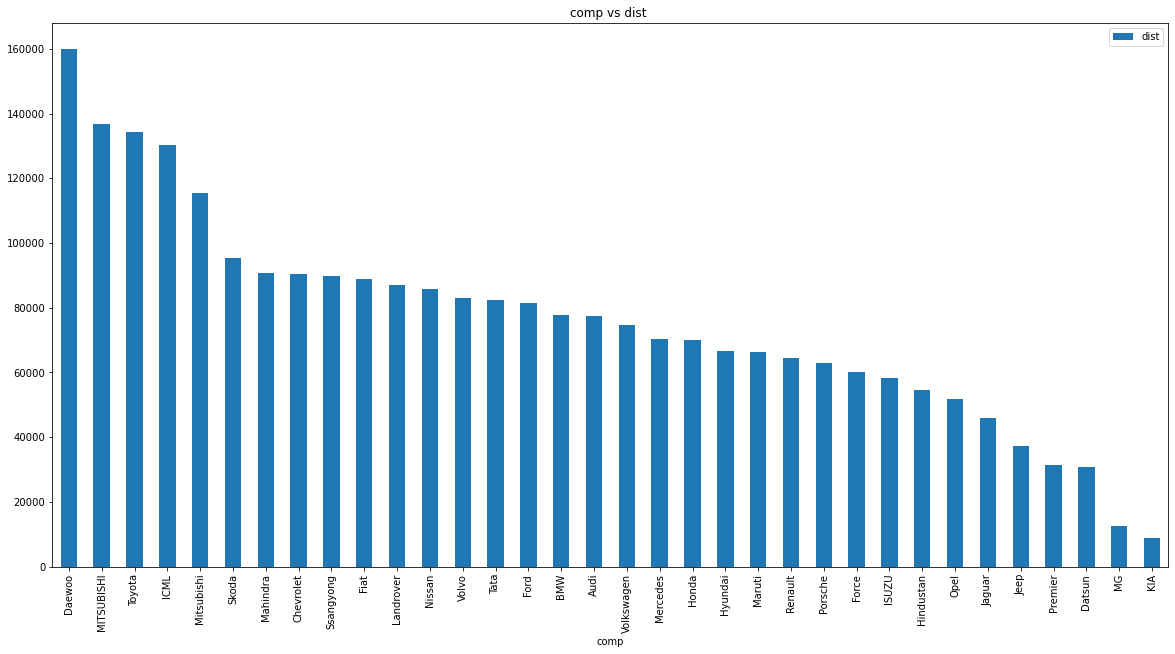

dist
comp                     
Daewoo      159950.714286
MITSUBISHI  136884.000000
Toyota      134213.782227
ICML        130126.000000
Mitsubishi  115547.228571
Skoda        95302.439735
Mahindra     90641.718397
Chevrolet    90458.176790
Ssangyong    89852.923077
Fiat         88729.992982
Landrover    87013.176471
Nissan       85902.804494
Volvo        82884.132075
Tata         82259.916111
Ford         81614.831546
BMW          77860.464912
Audi         77441.033333
Volkswagen   74765.115663
Mercedes     70204.834646
Honda        70029.204022
Hyundai      66771.403764
Maruti       66458.819287
Renault      64424.070707
Porsche      62874.400000
Force        60030.000000
ISUZU        58356.000000
Hindustan    54455.444444
Opel         51954.230769
Jaguar       46071.848485
Jeep         37393.828571
Premier      31320.000000
Datsun       30673.526316
MG           12470.392857
KIA           8769.923077

In [70]:
print('from the below figure we can easily understand the Daewoo  company have travel distance')
df1 = pd.DataFrame(raw_data.groupby(['comp'])['dist'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(20,10))
plt.title('comp vs dist ')
plt.show()
df1

from the below figure we can easily understand the porsche company have cost


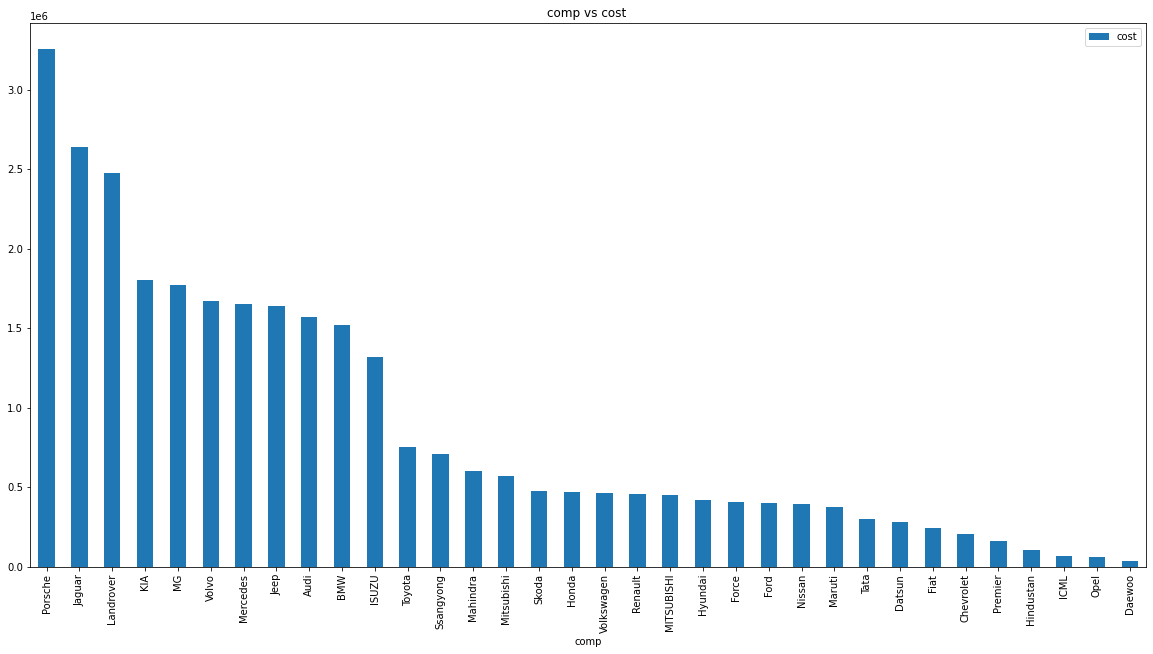

cost
comp                    
Porsche     3.257040e+06
Jaguar      2.637736e+06
Landrover   2.476015e+06
KIA         1.801115e+06
MG          1.772836e+06
Volvo       1.672766e+06
Mercedes    1.651188e+06
Jeep        1.638579e+06
Audi        1.573726e+06
BMW         1.518635e+06
ISUZU       1.319492e+06
Toyota      7.517195e+05
Ssangyong   7.099384e+05
Mahindra    6.031117e+05
Mitsubishi  5.690363e+05
Skoda       4.734462e+05
Honda       4.712408e+05
Volkswagen  4.641221e+05
Renault     4.569121e+05
MITSUBISHI  4.500000e+05
Hyundai     4.172228e+05
Force       4.041773e+05
Ford        3.975448e+05
Nissan      3.911729e+05
Maruti      3.723931e+05
Tata        2.974841e+05
Datsun      2.834298e+05
Fiat        2.426789e+05
Chevrolet   2.036165e+05
Premier     1.600000e+05
Hindustan   1.059444e+05
ICML        7.000000e+04
Opel        6.038462e+04
Daewoo      3.356429e+04

In [77]:
print('from the below figure we can easily understand the porsche company have cost')
df3 = pd.DataFrame(raw_data.groupby(['comp'])['cost'].mean().sort_values(ascending = False))
df3.plot.bar(figsize=(20,10))
plt.title('comp vs cost ')
plt.show()
df3

# comparision cost and distance with fueltype

from the below figure we can easily understand the diesel have high distance


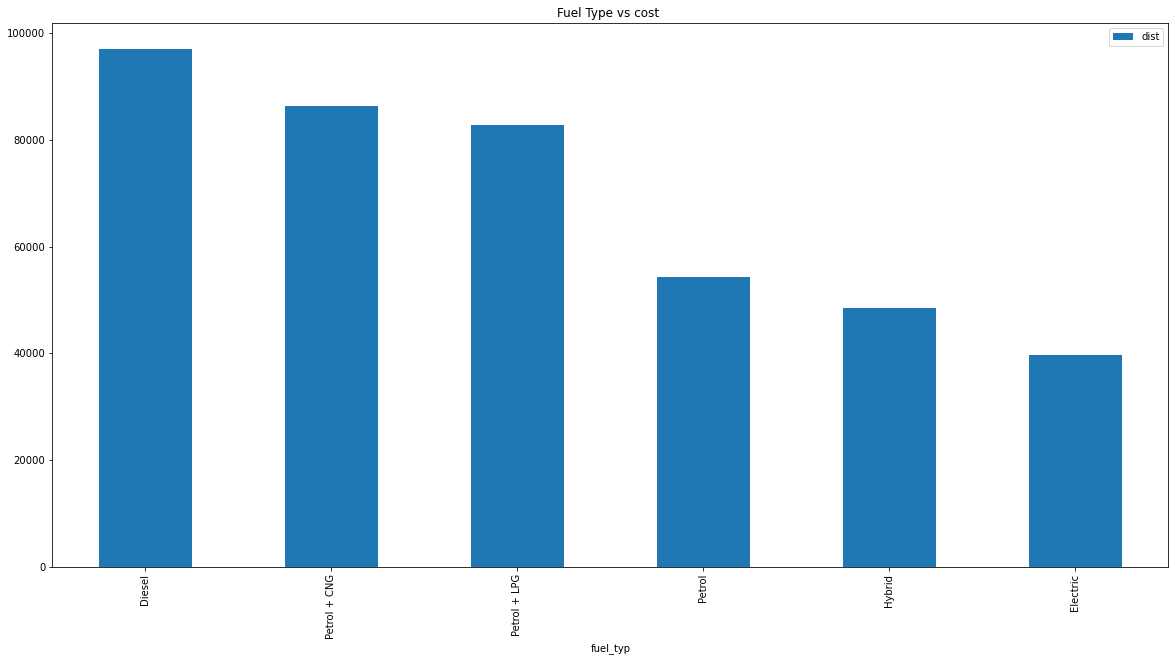

dist
fuel_typ                  
Diesel        97008.398122
Petrol + CNG  86392.271390
Petrol + LPG  82822.920477
Petrol        54282.922467
Hybrid        48484.000000
Electric      39637.541667

In [83]:
print('from the below figure we can easily understand the diesel have high distance')
df4 = pd.DataFrame(raw_data.groupby(['fuel_typ'])['dist'].mean().sort_values(ascending = False))
df4.plot.bar(figsize=(20,10))
plt.title('Fuel Type vs cost ')
plt.show()
df4

from the below figure we can easily understand the hybird have high cost


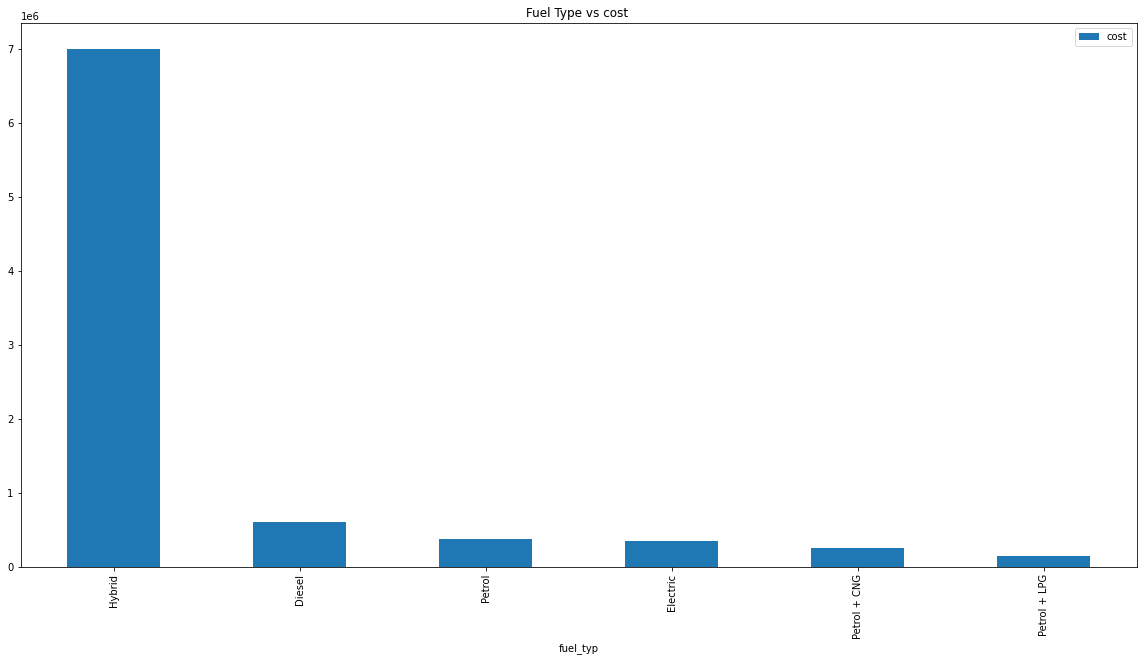

cost
fuel_typ                  
Hybrid        7.000000e+06
Diesel        6.067614e+05
Petrol        3.775602e+05
Electric      3.545037e+05
Petrol + CNG  2.521565e+05
Petrol + LPG  1.477889e+05

In [84]:
print('from the below figure we can easily understand the hybird have high cost')
df2 = pd.DataFrame(raw_data.groupby(['fuel_typ'])['cost'].mean().sort_values(ascending = False))
df2.plot.bar(figsize=(20,10))
plt.title('Fuel Type vs cost ')
plt.show()
df2

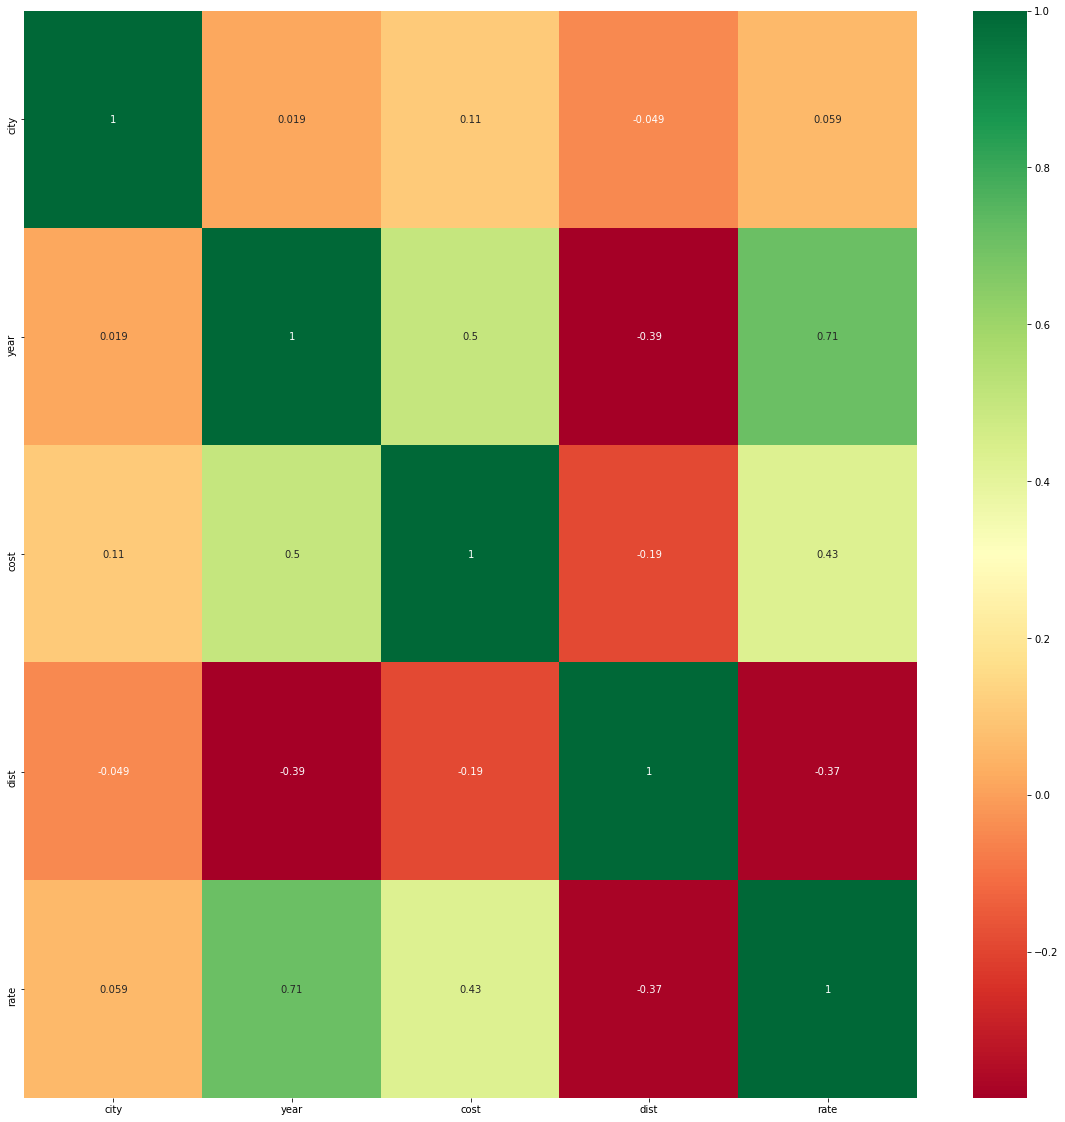

In [81]:
corrmat = raw_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(raw_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<AxesSubplot:>

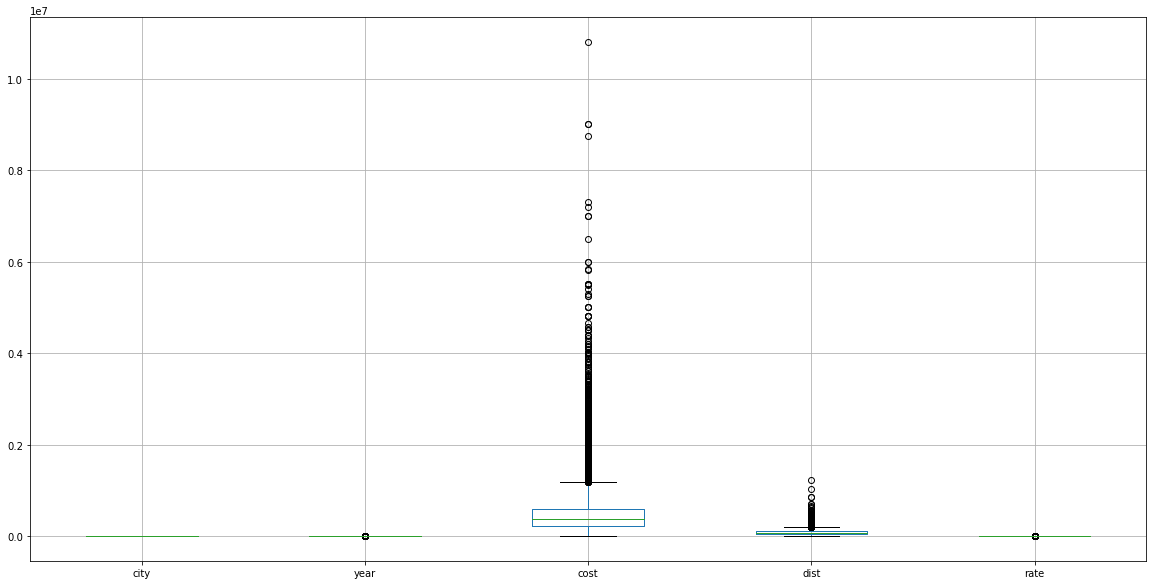

In [82]:
raw_data.boxplot(figsize=(20,10))

the cost level with fueal_type


<AxesSubplot:xlabel='fuel_typ', ylabel='cost'>

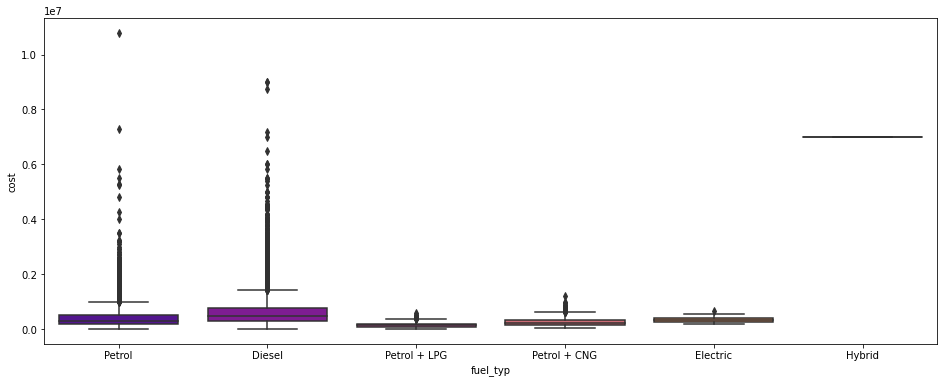

In [133]:
print('the cost level with fueal_type')
plt.figure(figsize=(16,6))
sns.boxplot(x=raw_data.fuel_typ,y=raw_data.cost,palette=("plasma"))

# missing values

city            0
year            0
comp            0
model           0
cost            0
dist            0
rate            0
prc_mnt         0
owr             0
fuel_typ        0
trans_typ    2816
Ins_typ         0
Rto_st          0
dtype: int64
Display the missing values : there is no missing values 



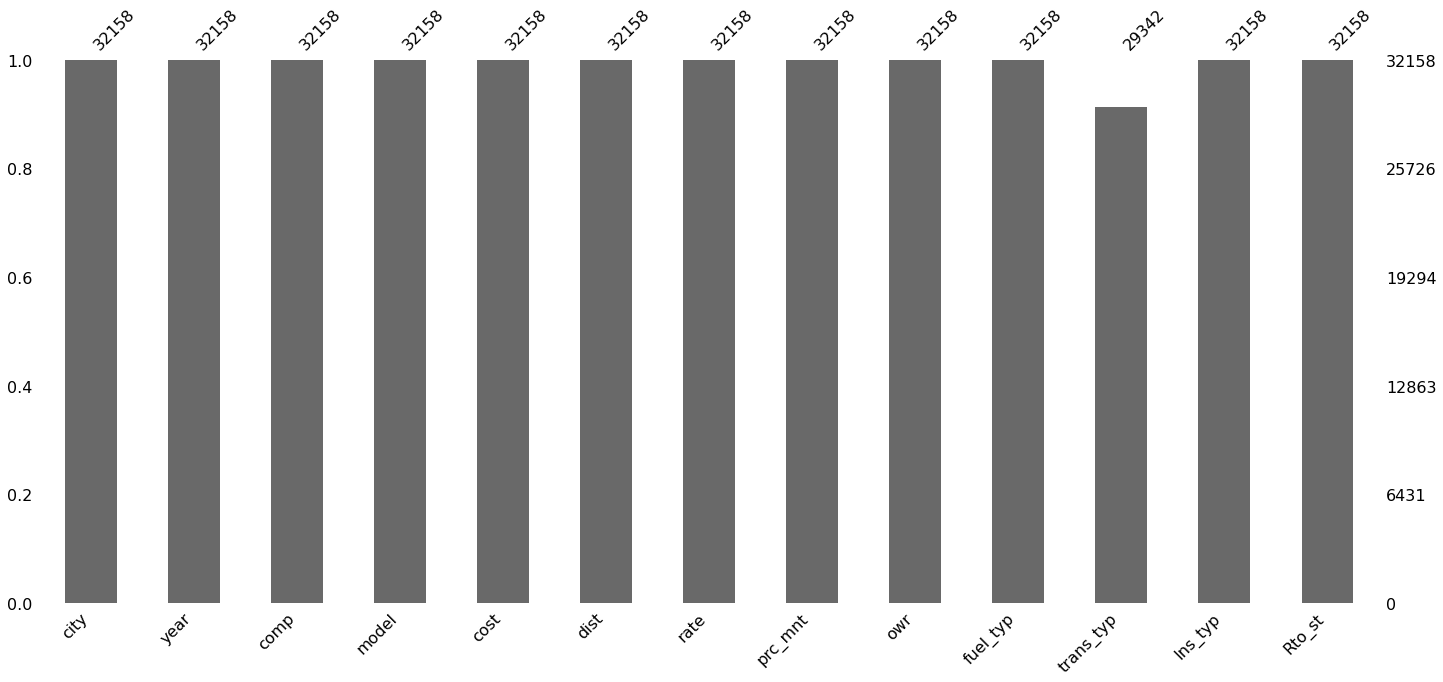

In [24]:
print(raw_data.isnull().sum())
print("Display the missing values : there is no missing values","\n")
msno.bar(raw_data)
plt.show()

In [25]:
raw_data.isnull().sum()

city            0
year            0
comp            0
model           0
cost            0
dist            0
rate            0
prc_mnt         0
owr             0
fuel_typ        0
trans_typ    2816
Ins_typ         0
Rto_st          0
dtype: int64

In [26]:
raw_data['trans_typ']=raw_data['trans_typ'].fillna('MANUAL')

city         0
year         0
comp         0
model        0
cost         0
dist         0
rate         0
prc_mnt      0
owr          0
fuel_typ     0
trans_typ    0
Ins_typ      0
Rto_st       0
dtype: int64
Display the missing values : there is no missing values 



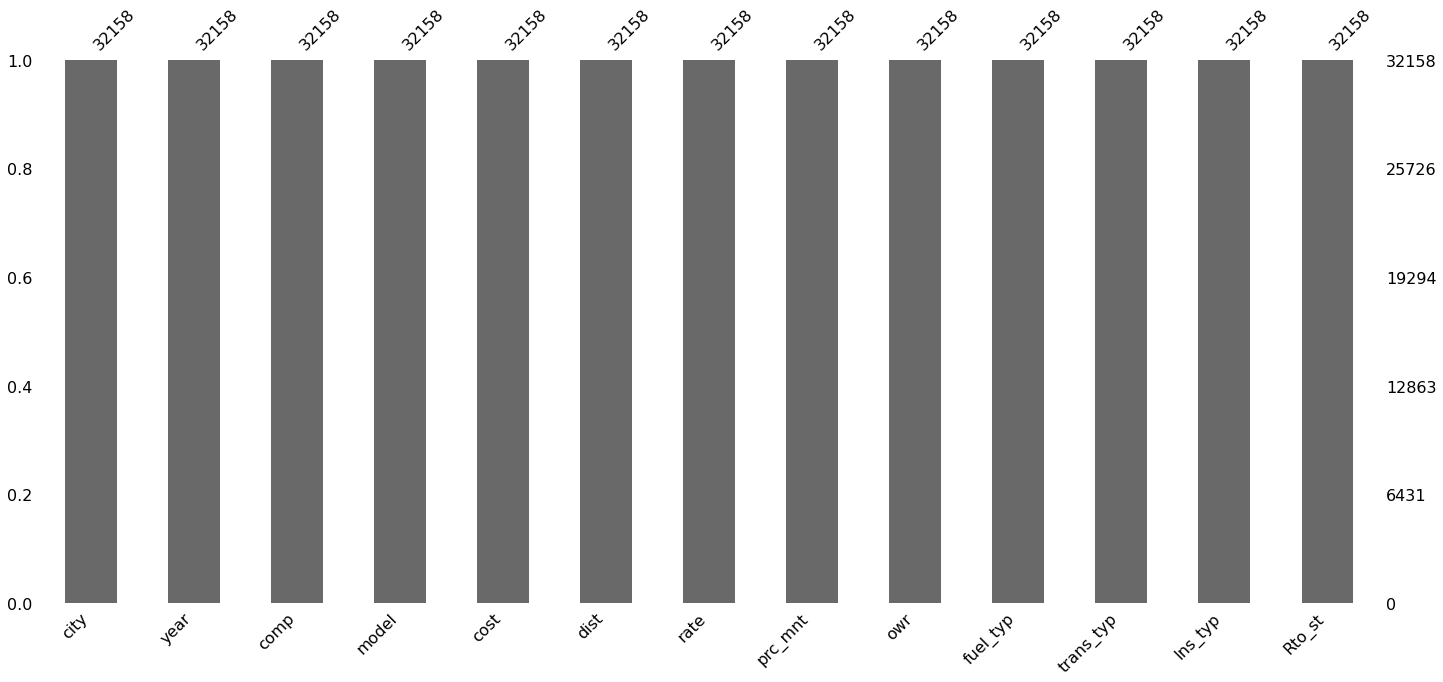

In [27]:
print(raw_data.isnull().sum())
print("Display the missing values : there is no missing values","\n")
msno.bar(raw_data)
plt.show()

In [28]:
raw_data['cost'].describe()

count    3.215800e+04
mean     4.760937e+05
std      4.521493e+05
min      1.000000e+00
25%      2.100000e+05
50%      3.680000e+05
75%      6.000000e+05
max      1.080170e+07
Name: cost, dtype: float64

In [29]:
raw_data.head()

city  year     comp            model      cost     dist  rate   prc_mnt  \
0  3686  2010   Maruti         Alto LXI  174699.0  34854.0   4.0       May   
1  3686  2013   Maruti  Wagon R 1.0 VXI  333999.0  39541.0   4.2      July   
2  3686  2014   Maruti  Wagon R 1.0 VXI  353199.0  23233.0   4.3     March   
3  3686  2013  Hyundai  Eon D LITE PLUS  237899.0  27748.0   4.4  November   
4  3686  2017  Hyundai     Eon ERA PLUS  300699.0  12238.0   4.4    August   

      owr fuel_typ trans_typ        Ins_typ Rto_st  
0   First   Petrol    MANUAL        Expired     AP  
1  Second   Petrol    MANUAL  Comprehensive     AP  
2  Second   Petrol    MANUAL  Comprehensive     AP  
3   First   Petrol    MANUAL  Comprehensive     AP  
4  Second   Petrol    MANUAL        Expired     TS

In [30]:
raw_data['current_year']=2021
raw_data['no_year']=raw_data['current_year']-raw_data['year']
raw_data.drop(['year','current_year'],axis=1,inplace=True)

In [31]:
raw_data.head(3)

city    comp            model      cost     dist  rate prc_mnt     owr  \
0  3686  Maruti         Alto LXI  174699.0  34854.0   4.0     May   First   
1  3686  Maruti  Wagon R 1.0 VXI  333999.0  39541.0   4.2    July  Second   
2  3686  Maruti  Wagon R 1.0 VXI  353199.0  23233.0   4.3   March  Second   

  fuel_typ trans_typ        Ins_typ Rto_st  no_year  
0   Petrol    MANUAL        Expired     AP       11  
1   Petrol    MANUAL  Comprehensive     AP        8  
2   Petrol    MANUAL  Comprehensive     AP        7

# Feature transformation

<AxesSubplot:>

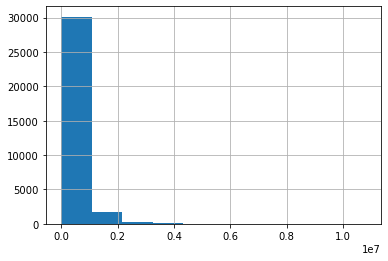

In [32]:
raw_data['cost'].hist()

<AxesSubplot:>

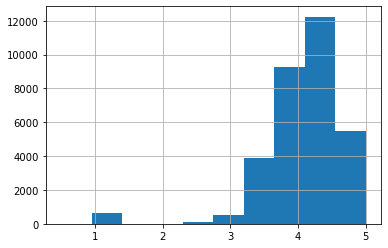

In [33]:
raw_data['rate'].hist()

<AxesSubplot:>

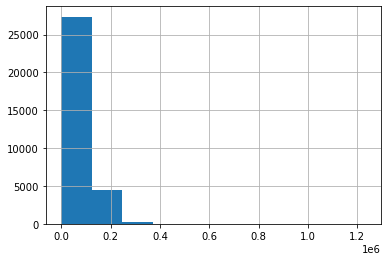

In [34]:
raw_data['dist'].hist()

<AxesSubplot:>

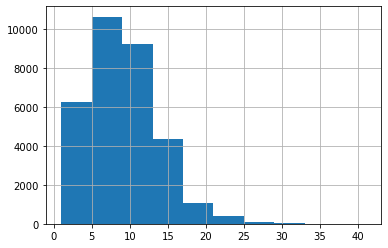

In [35]:
raw_data['no_year'].hist()

In [36]:
raw_data['cost']=np.log(raw_data['cost']+1)
raw_data['cost'].skew()

-0.4878417660443135

<AxesSubplot:>

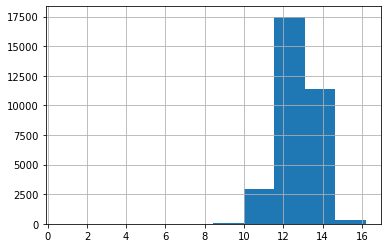

In [37]:
raw_data['cost'].hist()

In [38]:
raw_data['dist']=np.log(raw_data['dist']+1)
raw_data['dist'].skew()

-2.3582887057132034

<AxesSubplot:>

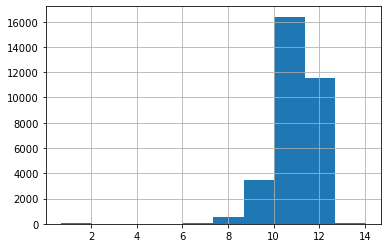

In [39]:
raw_data['dist'].hist()

In [40]:
raw_data['rate']=np.log(raw_data['rate']+1)
raw_data['rate'].skew()

-3.9311612274143655

<AxesSubplot:>

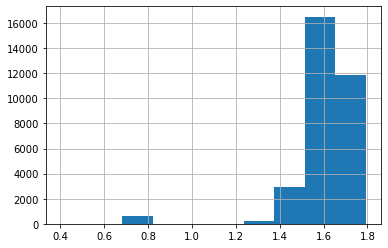

In [41]:
raw_data['rate'].hist()

In [42]:
raw_data['no_year']=np.log(raw_data['no_year']+1)
raw_data['no_year'].skew()

-0.3964664024196868

<AxesSubplot:>

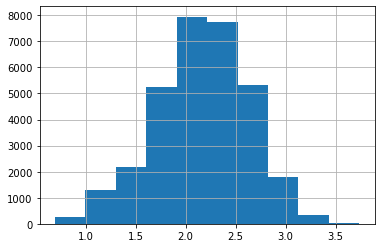

In [43]:
raw_data['no_year'].hist()

# outliers

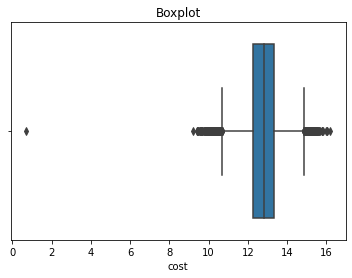

In [44]:
sns.boxplot(raw_data.cost)
plt.title('Boxplot')
plt.show()

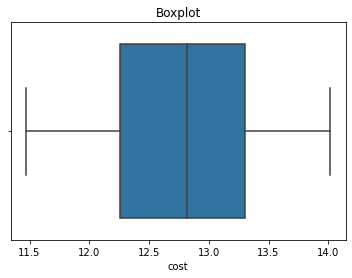

In [45]:
from feature_engine.outliers import Winsorizer
windsoriser = Winsorizer(capping_method='gaussian', # choose skewed for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['cost'])
df= windsoriser.fit_transform(raw_data[['cost']])

# we can inspect the minimum caps and maximum caps 
windsoriser.left_tail_caps_, windsoriser.right_tail_caps_

# lets see boxplot
sns.boxplot(df.cost)
plt.title('Boxplot')
plt.show()

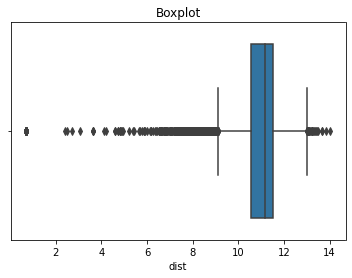

In [46]:
sns.boxplot(raw_data.dist)
plt.title('Boxplot')
plt.show()

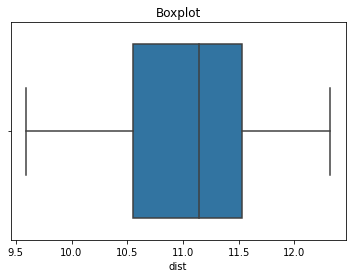

In [47]:
from feature_engine.outliers import Winsorizer
windsoriser = Winsorizer(capping_method='gaussian', # choose skewed for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['dist'])
df= windsoriser.fit_transform(raw_data[['dist']])

# we can inspect the minimum caps and maximum caps 
windsoriser.left_tail_caps_, windsoriser.right_tail_caps_

# lets see boxplot
sns.boxplot(df.dist)
plt.title('Boxplot')
plt.show()

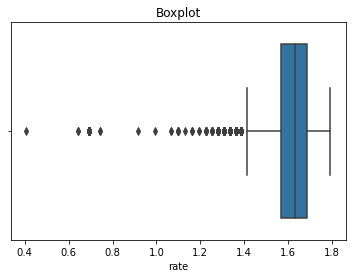

In [48]:
sns.boxplot(raw_data.rate)
plt.title('Boxplot')
plt.show()

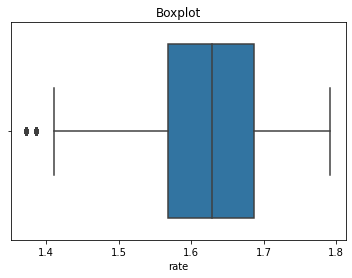

In [49]:
from feature_engine.outliers import Winsorizer
windsoriser = Winsorizer(capping_method='gaussian', # choose skewed for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['rate'])
df= windsoriser.fit_transform(raw_data[['rate']])

# we can inspect the minimum caps and maximum caps 
windsoriser.left_tail_caps_, windsoriser.right_tail_caps_

# lets see boxplot
sns.boxplot(df.rate)
plt.title('Boxplot')
plt.show()

# encoding

In [50]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
raw_data.comp=LE.fit_transform(raw_data.comp)
raw_data.model=LE.fit_transform(raw_data.model)
raw_data.Rto_st=LE.fit_transform(raw_data.Rto_st)
raw_data.prc_mnt=LE.fit_transform(raw_data.prc_mnt)
raw_data.owr=LE.fit_transform(raw_data.owr)
raw_data=pd.get_dummies(raw_data,drop_first=True)
raw_data.head()

city  comp  model       cost       dist      rate  prc_mnt  owr  Rto_st  \
0  3686    20    149  12.070825  10.458952  1.609438        8    2       4   
1  3686    20   2428  12.718896  10.585119  1.648659        5    5       4   
2  3686    20   2428  12.774790  10.053372  1.667707        7    5       4   
3  3686    10    775  12.379606  10.230955  1.686399        9    2       4   
4  3686    10    779  12.613868   9.412383  1.686399        1    5      46   

    no_year  fuel_typ_Electric  fuel_typ_Hybrid  fuel_typ_Petrol  \
0  2.484907                  0                0                1   
1  2.197225                  0                0                1   
2  2.079442                  0                0                1   
3  2.197225                  0                0                1   
4  1.609438                  0                0                1   

   fuel_typ_Petrol + CNG  fuel_typ_Petrol + LPG  trans_typ_MANUAL  \
0                      0                      0                 1   
1                      0                      0                 1   
2                      0                      0                 1   
3                      0                      0                 1   
4                      0                      0                 1   

   Ins_typ_Comprehensive  Ins_typ_Expired  Ins_typ_Zero_Dep  
0                      0                1                 0  
1                      1                0                 0  
2                      1                0                 0  
3                      1                0                 0  
4                      0                1                 0

In [51]:
raw_data.shape

(32158, 19)

# Train-test-split

In [52]:
from sklearn.model_selection import train_test_split
y=raw_data['cost']
x=raw_data.drop(columns=['cost'])

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state = 101)
x_train.head()

city  comp  model       dist      rate  prc_mnt  owr  Rto_st   no_year  \
14058   777    20   1557   9.144094  1.774952        6    2      31  1.098612   
27889  1692    20   2402   9.069928  1.757858        3    2      18  1.609438   
25413  1692     0     67  11.405496  1.589235        1    5      18  2.302585   
14219   777    30   1447   9.616938  1.568616        8    2      51  2.484907   
16344  2423    19   2572  11.301834  1.547563       11    5      31  2.484907   

       fuel_typ_Electric  fuel_typ_Hybrid  fuel_typ_Petrol  \
14058                  0                0                1   
27889                  0                0                0   
25413                  0                0                0   
14219                  0                0                0   
16344                  0                0                0   

       fuel_typ_Petrol + CNG  fuel_typ_Petrol + LPG  trans_typ_MANUAL  \
14058                      0                      0                 1   
27889                      0                      0                 1   
25413                      0                      0                 0   
14219                      0                      0                 1   
16344                      0                      0                 1   

       Ins_typ_Comprehensive  Ins_typ_Expired  Ins_typ_Zero_Dep  
14058                      0                0                 0  
27889                      1                0                 0  
25413                      0                1                 0  
14219                      0                0                 0  
16344                      1                0                 0

In [53]:
y_train.head(3)

14058    13.235694
27889    13.652993
25413    13.815512
Name: cost, dtype: float64

In [54]:
x_test.head()

city  comp  model       dist      rate  prc_mnt  owr  Rto_st   no_year  \
30296   769    10   2635  11.696471  1.547563        9    9      22  2.484907   
2277   3686    31   1240  12.659887  1.504077        6    5       4  2.772589   
15629  2423     4   1805   9.763075  1.686399        2    2      31  1.609438   
14872  2423    20   2142  10.841129  1.667707       11    2      31  2.397895   
16969  2423    32   1294  11.618474  1.609438       11    5      31  2.397895   

       fuel_typ_Electric  fuel_typ_Hybrid  fuel_typ_Petrol  \
30296                  0                0                1   
2277                   0                0                0   
15629                  0                0                0   
14872                  0                0                0   
16969                  0                0                0   

       fuel_typ_Petrol + CNG  fuel_typ_Petrol + LPG  trans_typ_MANUAL  \
30296                      0                      0                 1   
2277                       0                      0                 1   
15629                      1                      0                 1   
14872                      0                      0                 1   
16969                      0                      0                 1   

       Ins_typ_Comprehensive  Ins_typ_Expired  Ins_typ_Zero_Dep  
30296                      0                0                 0  
2277                       0                1                 0  
15629                      1                0                 0  
14872                      0                1                 0  
16969                      1                0                 0

In [55]:
y_test.head(3)

30296    12.111767
2277     12.706851
15629    12.611541
Name: cost, dtype: float64

In [56]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((28942, 18), (28942,), (3216, 18), (3216,))

# Modeling

# 1.Linear regression

In [57]:
import statsmodels.api as smf
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [58]:
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
pred_train=lr.predict(x_train)
print(r2_score(y_train,pred_train))
print(r2_score(y_test,pred_test))

0.6926200919295314
0.6971966333538034


# 2.RandomForestRegressor

In [188]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [189]:
pred_test=regressor.predict(x_test)
pred_train=regressor.predict(x_train)
print(r2_score(y_train,pred_train))
print(r2_score(y_test,pred_test))

0.9887470197954028
0.9195240473424621


# 3.CatBoostRegressor

In [190]:
from catboost import CatBoostRegressor
cbr = CatBoostRegressor(depth=16,iterations=100,learning_rate=0.05)
cbr.fit(x_train,y_train)

0:	learn: 0.8200234	total: 1.04s	remaining: 1m 42s
1:	learn: 0.7923010	total: 1.86s	remaining: 1m 31s
2:	learn: 0.7643267	total: 2.67s	remaining: 1m 26s
3:	learn: 0.7378533	total: 3.53s	remaining: 1m 24s
4:	learn: 0.7146007	total: 4.37s	remaining: 1m 23s
5:	learn: 0.6900158	total: 5.25s	remaining: 1m 22s
6:	learn: 0.6673981	total: 6.09s	remaining: 1m 20s
7:	learn: 0.6480002	total: 6.9s	remaining: 1m 19s
8:	learn: 0.6273718	total: 7.74s	remaining: 1m 18s
9:	learn: 0.6082412	total: 8.55s	remaining: 1m 16s
10:	learn: 0.5896069	total: 9.36s	remaining: 1m 15s
11:	learn: 0.5714551	total: 10.2s	remaining: 1m 14s
12:	learn: 0.5545181	total: 11s	remaining: 1m 13s
13:	learn: 0.5383965	total: 11.9s	remaining: 1m 12s
14:	learn: 0.5244644	total: 12.8s	remaining: 1m 12s
15:	learn: 0.5102059	total: 13.6s	remaining: 1m 11s
16:	learn: 0.4972812	total: 14.5s	remaining: 1m 10s
17:	learn: 0.4838210	total: 15.5s	remaining: 1m 10s
18:	learn: 0.4723187	total: 16.4s	remaining: 1m 9s
19:	learn: 0.4621114	total

In [191]:
pred_test=cbr.predict(x_test)
pred_train=cbr.predict(x_train)
print(r2_score(y_train,pred_train))
print(r2_score(y_test,pred_test))

0.9269718946788773
0.895053561464857


# 4.XGBRegressor

In [192]:
import xgboost
xgb=xgboost.XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [193]:
pred_test=xgb.predict(x_test)
pred_train=xgb.predict(x_train)
print(r2_score(y_train,pred_train))
print(r2_score(y_test,pred_test))

0.9602869181637694
0.9361003752224598
